## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [2]:
df = pd.read_csv('datasets/bike.csv', sep=',')
df

,instant,year,month,day,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011,1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011,1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011,1,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011,1,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011,1,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012,12,27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012,12,28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012,12,29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012,12,30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


---------------------------------------------------------------------------









## 1-. Calculate the following statistical metrics for each one of the features (except dteday): min, max, mean, standard deviation, minN, maxN, Q1, Q2 (median), Q3, IQR

#### Se quitó la característica instant (por ser solamente el índice) y las características: year, month, day, yr, holiday, weekday, workingday, mnth, season y weathersit se quitaron por ser características ordinales, ya que estas métricas estadísticas sólo son para caracterísricas numéricas. 

In [3]:
df1 = df
df1 = df1.drop('instant',1)
df1 = df1.drop('year',1)
df1 = df1.drop('month',1)
df1 = df1.drop('day',1)
df1 = df1.drop('yr',1)
df1 = df1.drop('holiday',1)
df1 = df1.drop('weekday',1)
df1 = df1.drop('workingday',1)
df1 = df1.drop('mnth',1)
df1 = df1.drop('season',1)
df1 = df1.drop('weathersit',1)

nfeatures = len(df1.columns)
m = 10 # min, max, mean, std, Q1, Q2 (median), Q3, IRQ, minN, maxN

values = np.zeros((m, nfeatures))
columns = df1.columns
index = ['min', 'max', 'mean', 'std', 'Q1', 'Q2 (median)', 'Q3', 'IRQ', 'minN', 'maxN']

for i,column in enumerate(df1.columns):
    values[0,i] = np.min( df1[column].values )
    values[1,i] = np.max( df1[column].values )
    values[2,i] = np.mean( df1[column].values )
    values[3,i] = np.std( df1[column].values )
    values[4,i] = np.percentile( df1[column].values, 25 )
    values[5,i] = np.percentile( df1[column].values, 50 )
    values[6,i] = np.percentile( df1[column].values, 75 )
    values[7,i] = values[6,i]-values[4,i]
    values[8,i] = values[4,i] - 1.5*values[7,i]
    values[9,i] = values[6,i] + 1.5*values[7,i]
    
dfs = pd.DataFrame(values, columns=columns, index=index)
dfs

,temp,atemp,hum,windspeed,casual,registered,cnt
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.182926,0.162850,0.142332,0.077445,686.152682,1559.188805,1935.885956
Q1,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
Q2 (median),0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
Q3,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
IRQ,0.318333,0.270760,0.210209,0.098265,780.500000,2279.500000,2804.000000
minN,-0.140416,-0.068297,0.204687,-0.012447,-855.250000,-922.250000,-1054.000000
maxN,1.132916,1.014741,1.045521,0.380611,2266.750000,8195.750000,10162.000000


---------------------------------------------------------------------------









## 2-. Graph for each feature (except dteday): histogram and boxplot

#### Se quitó la característica instant (por ser solamente el índice) y las características: year, month, day, yr, holiday, weekday, workingday, mnth, season y weathersit se quitaron por ser características ordinales, ya que estas gráficas aplican solamente para visualizar características numéricas, no ordinales ni categóricas.

In [4]:
df1 = df
df1 = df1.drop('instant',1)
df1 = df1.drop('year',1)
df1 = df1.drop('month',1)
df1 = df1.drop('day',1)
df1 = df1.drop('yr',1)
df1 = df1.drop('holiday',1)
df1 = df1.drop('weekday',1)
df1 = df1.drop('workingday',1)
df1 = df1.drop('mnth',1)
df1 = df1.drop('season',1)
df1 = df1.drop('weathersit',1)


In [5]:
def printplots(x, nombre):
    plt.figure()
    plt.figure(figsize=(7, 5))
    plt.suptitle(nombre)
    plt.subplot(1,2,1)
    plt.hist( x, bins=20 )
    
    plt.subplot(1,2,2)
    plt.boxplot(x)
    plt.show()

<Figure size 432x288 with 0 Axes>

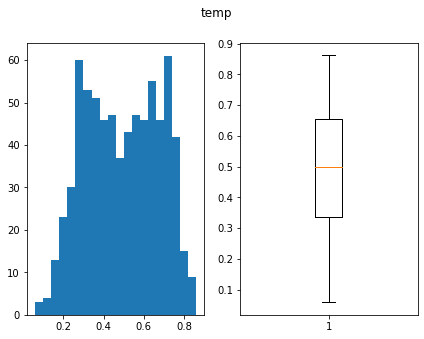

<Figure size 432x288 with 0 Axes>

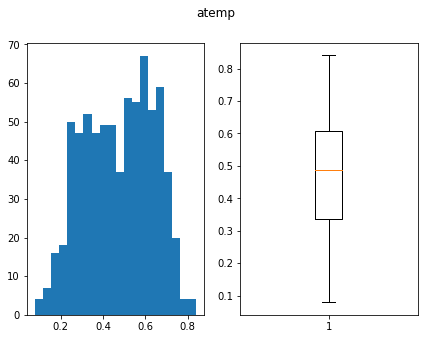

<Figure size 432x288 with 0 Axes>

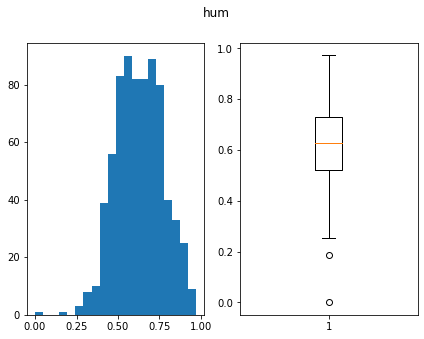

<Figure size 432x288 with 0 Axes>

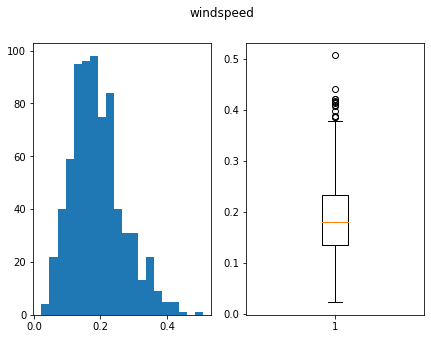

<Figure size 432x288 with 0 Axes>

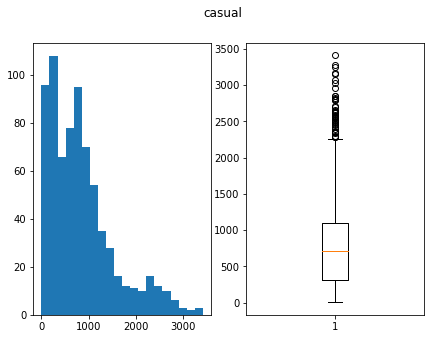

<Figure size 432x288 with 0 Axes>

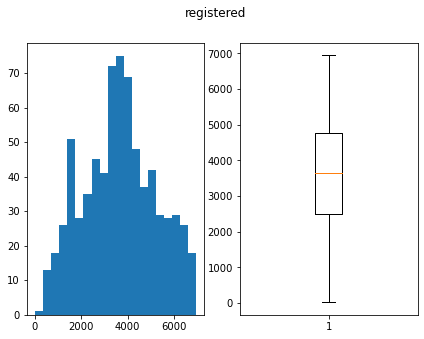

<Figure size 432x288 with 0 Axes>

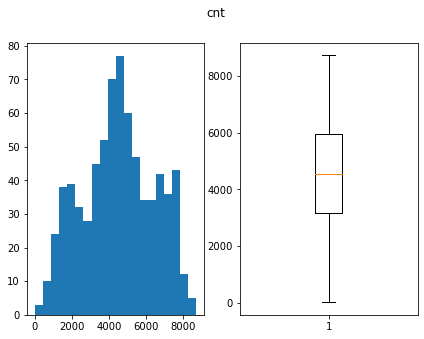

In [6]:
for i in range(0, len(df1.columns)):
    printplots(df1[df1.columns[i]].values, df1.columns[i])

#### Para las características: year, month, day, yr, holiday, weekday, workingday, mnth, season y weathersit , se decidió hacerles unas gráficas discretas (countplots, por ejemplo, ya que son características ordinales), de este modo se representan de mejor manera, aunque algunas de estas variables incluyan información obvia.

<Figure size 432x288 with 0 Axes>

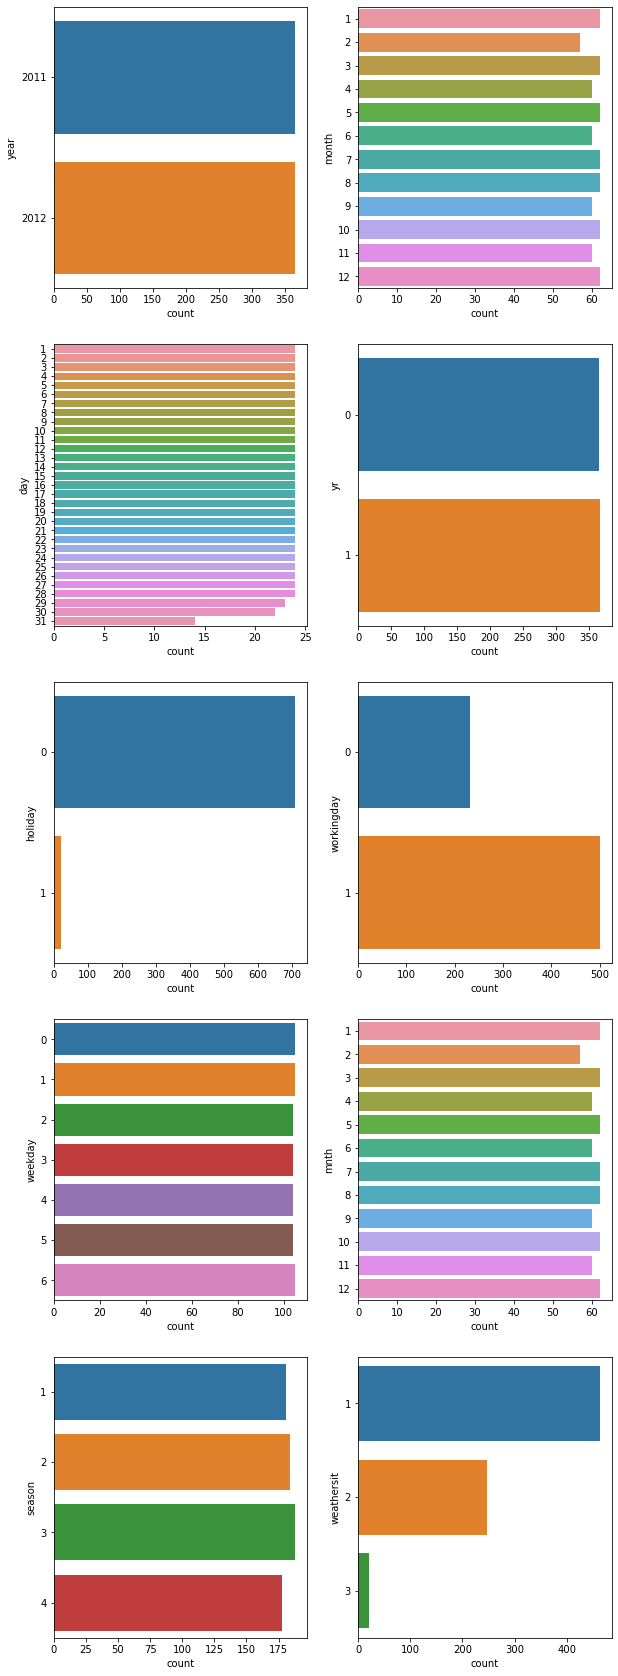

In [7]:
plt.figure()

plt.figure(figsize=(10, 30))

plt.subplot(5,2,1)
sns.countplot(data=df, y=df['year'])
plt.subplot(5,2,2)
sns.countplot(data=df, y=df['month'])
plt.subplot(5,2,3)
sns.countplot(data=df, y=df['day'])
plt.subplot(5,2,4)
sns.countplot(data=df, y=df['yr'])
plt.subplot(5,2,5)
sns.countplot(data=df, y=df['holiday'])
plt.subplot(5,2,6)
sns.countplot(data=df, y=df['workingday'])
plt.subplot(5,2,7)
sns.countplot(data=df, y=df['weekday'])
plt.subplot(5,2,8)
sns.countplot(data=df, y=df['mnth'])
plt.subplot(5,2,9)
sns.countplot(data=df, y=df['season'])
plt.subplot(5,2,10)
sns.countplot(data=df, y=df['weathersit'])

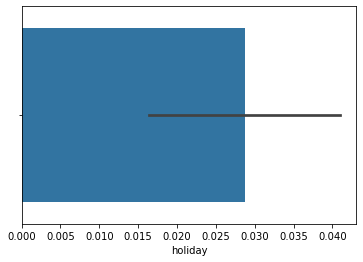

In [11]:
sns.barplot(data=df, x='holiday')

---------------------------------------------------------------------------









## 3-. Graph the correlation matrix (showing the absolute values)

#### Se quitó la característica instant (por ser solamente el índice) y las características: year, month, day, yr, holiday, weekday, workingday, mnth, season y weathersit se quitaron por ser características ordinales, ya que la correlación está hecha para calcular la relación lineal entre dos caracterísricas numéricas, no ordinales ni categóricas.

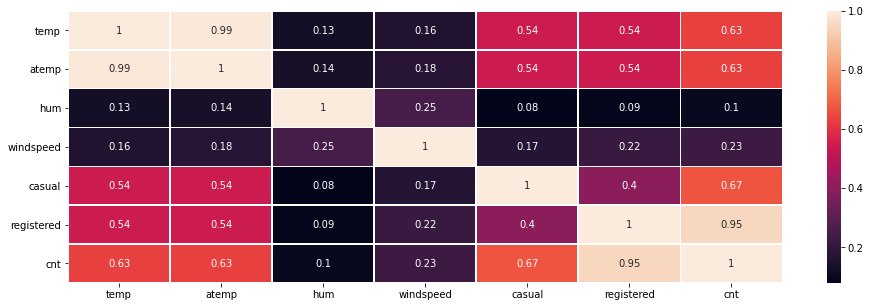

In [10]:
df1 = df
df1 = df1.drop('instant',1)
df1 = df1.drop('year',1)
df1 = df1.drop('month',1)
df1 = df1.drop('day',1)
df1 = df1.drop('yr',1)
df1 = df1.drop('holiday',1)
df1 = df1.drop('weekday',1)
df1 = df1.drop('workingday',1)
df1 = df1.drop('mnth',1)
df1 = df1.drop('season',1)
df1 = df1.drop('weathersit',1)

dfc = df1.corr()
dfcabs = pd.DataFrame(np.round(np.abs(dfc.values),2), index = dfc.index, columns = dfc.columns)

plt.figure(figsize = (16,5))
ax = sns.heatmap(dfcabs, annot=True, linewidths=.5)

---------------------------------------------------------------------------









## 4-. Graph the scatter plot using the feature cnt and the one with the highest correlation with that feature (cnt). Do the same with the feature with the lowest correlation.

#### 4.1-. La característica con la correlación más grande con la característica 'cnt', es 'registered'. Y es obvio que esta relación sea muy grande, llegando a valores de 0.95, debido a que se intuye que mientras mayor sea el número de bicicletas rentadas, por consecuencia, habrá un mayor número de clientes registrados, van prácticamente de la mano. Y por el contrario, mientras menor sea la cantidadd de bicicletas rentadas, menor será el número de clientes registrados. 

#### Estas afirmaciones se pueden confirmar con el siguiente scatterplot, donde queda muy claro que el número de clientes registrados depende de la cantidad de bicicletas rentadas.

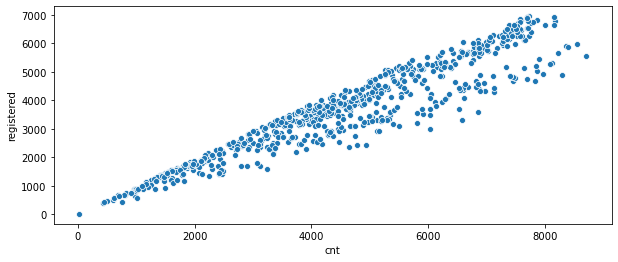

In [11]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='cnt', y='registered')

#### 4.2-. La característica con la correlación más pequeña con la característica 'cnt', es 'hum'. Practicamente solamente es un 0.1, y se ve claramente en el scatterplot que estas dos variables no están relacionadas. Por ende, la humedad no afecta en la cantidad de bicicletas rentadas, no importa si la humedad es de 0.8 o de 0.6, en ese nivel de humedad puede haber un gran nivel de rentas, y a su vez, en otro día con la misma humedad puede existir un nivel de rentas muy bajo, no está muy claro que exista una relación, los datos están muy dispersos.

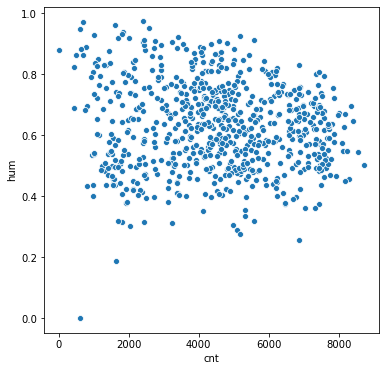

In [12]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='cnt', y='hum')

---------------------------------------------------------------------------









## 5-. Graph one scatter plot using four features: x, y, size, and color

### En este scatterplot se relaciona la cantidad de clientes registrados (x) y clientes casuales (y). En este caso, el color y el tamaño son representados por la cantidad de rentas, mientras más oscuro sea el color y más grande sea el círculo, significa que se rentaron más bicicletas.

### Aquí nos podemos percatar que, como tal, no existe una relación lineal entre registered y casual, se tiene un 0.4 de correlación lineal. Lo único que se puede observar y que resulta interesante, es que el porcentaje de bicicletas rentadas por usuarios registrados es mayor que el porcentaje de bicicletas rentadas por usuarios casuales, se observa en el scatterplot una gran concentración de rentas por la parte inferior del eje 'y' (el eje de casual) que se estira a lo largo del eje 'x' (el eje de registered).

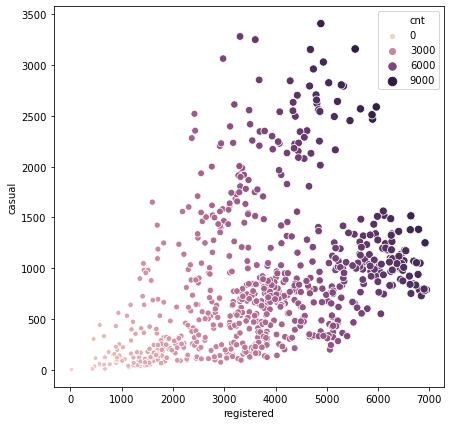

In [13]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='registered', y='casual', size='cnt', hue='cnt')

---------------------------------------------------------------------------









## 6-. Insights (descubrimientos)
## Write at least four insights from the data (justifying with metrics or graphs). Insights consist of some interesting facts that you discover from the Exploratory Data Analysis.

### 6.1-. Mes-Rentas

#### En primer lugar, podemos ver que existe una relación entre la cantidad de rentas y el mes del año. Los meses con mayor cantidad de bicicletas rentadas son meses de verano (Abril, Mayo, Junio) y de otoño (Julio, Agosto, Septiembre); en cambio, los meses primaverales (Enero, Febrero, Marzo) y 2/3 de los meses invernales (Noviembre y Diciembre) son los que menos rentas consiguen.

#### Parecer ser que el mes con mayor rentas de bicicletas es Septiembre, y el mes con la menor cantidad de rentas es Enero.

#### NOTA: Recordar que esta database fue hecha por portugueses, por esto mismo las estaciones del año son diferentes que aquí en México y abarcan diferentes meses.

<Figure size 432x288 with 0 Axes>

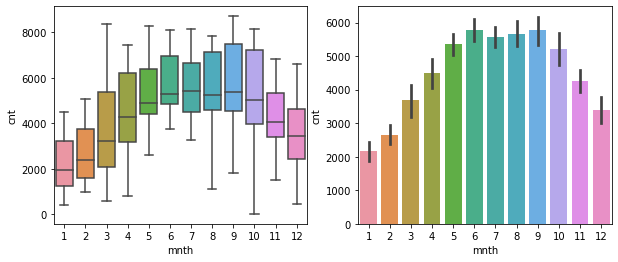

In [14]:
plt.figure()

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='mnth', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data=df, x='mnth', y='cnt')


### 6.2-. Estación del año-Rentas

#### Corroborando el descubrimiento anterior, nos podemos percatar que, efectivamente, las estaciones del año con mayor cantidad de rentas son Otoño y Verano. En cambio, las estaciones del año con menor cantidad de rentas son Invierno y Primavera.

#### La estación con menor cantidad de rentas es Primavera y la estación con la mayor cantidad de rentas es Otoño. Podemos observar que la estación de Invierno se pudo posicionar más arriba gracias al mes de Octubre, el cual es uno de los meses con la mayor cantidad de rentas (ver plots de la sección 6.1 para corroborar este dato).

<Figure size 432x288 with 0 Axes>

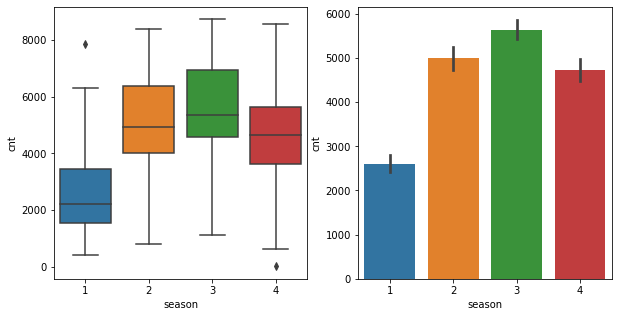

In [15]:
plt.figure()

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='season', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data=df, x='season', y='cnt')

#### Otro punto de vista en un scatterplot donde podemos observar la cantidad de rentas en cada estación del año durante los 2 años.

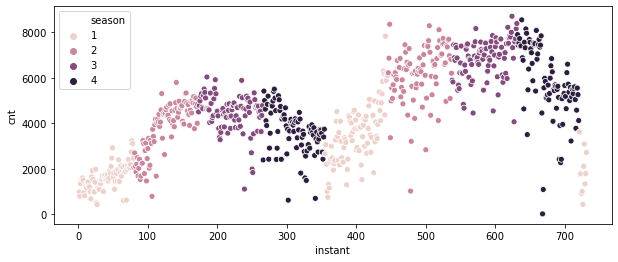

In [16]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='instant', y='cnt', hue='season')

### 6.3-. Rentas de bicicletas en días de trabajo o días libres por estación del año. Además de la relación existente entre las rentas con la temperatura.

#### Nos podemos percatar que 3/4 partes de las estaciones del año tienen una mayor renta de bicicletas en días que hay trabajo (color naranja). Y como era de suponerse, el verano posee una mayor cantidad de rentas en días que no hay trabajo (color azul). 

<Figure size 432x288 with 0 Axes>

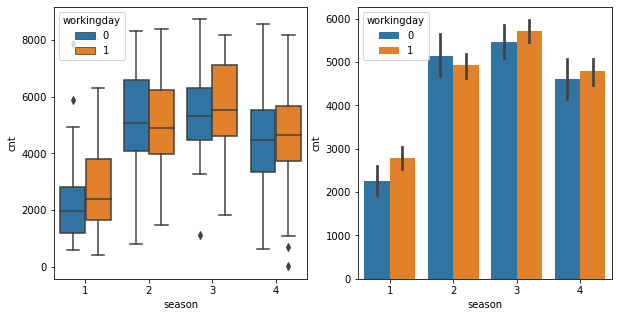

In [17]:
plt.figure()

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='season', y='cnt', hue='workingday')
plt.subplot(1,2,2)
sns.barplot(data=df, x='season', y='cnt', hue='workingday')

#### Si bien, las características 'cnt' y 'temp' sólo tienen un 0.63 de correlación lineal, podemos observar que mientras mayor sea la temperatura, existe una mayor demanda de rentas, y mientras menor sea la temperatura, esta rentabilidad concentra valores más pequeños. Podemos suponer que en las estaciones y en los meses más fríos hay menos rentas por este mismo factor de la temperatura fría, y en los meses más cálidos hay una mayor renta de bicicletas.

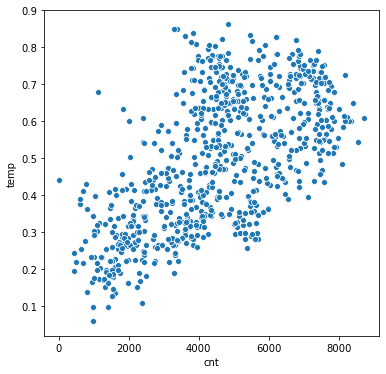

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='cnt', y='temp')

#### Y en estos boxplots relacionados con la temperatura, nos podemos percatar que, en efecto, los boxplots season-temp y mnth-temp, tienen una forma similar a sus contrapartes season-cont y mnth-cont. Donde los meses y las estaciones más calurosas son los que más rentas poseen, y en los meses y estaciones más frías las rentas decaen. Por esto mismo, en primavera se tiene la cantidad de días libres con menor auge de rentas debido a las bajas temperaturas, sencillamente las personas prefieren hacer otras cosas que salir en bicicleta con la temperatura muy baja, a pesar de tener el día libre.

#### Podemos decir que, por lo visto, la temperatura sí afecta el nivel de rentas del establecimiento.

#### Calor = Mayor cantidad de rentas.
#### Frío = Menor cantidad de rentas.

Izquierda: valores relacionados con la temperatura ------- Derecha: valores relacionados con las rentas


<Figure size 432x288 with 0 Axes>

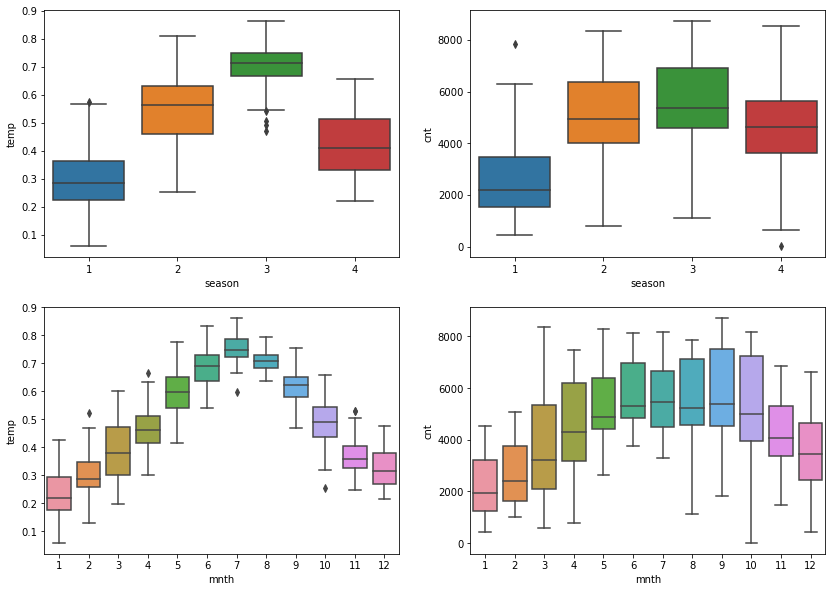

In [19]:
plt.figure()

plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
sns.boxplot(data=df, x='season', y='temp')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='season', y='cnt')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='mnth', y='temp')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='mnth', y='cnt')

print('Izquierda: valores relacionados con la temperatura ------- Derecha: valores relacionados con las rentas')

#### Otro punto de vista de que la temperatura está relacionada con la cantidad de rentas.

#### Vista de los dos años juntos. La primera parábola hace referencia al año 2011 y la segunda parábola más grande al año 2012.

#### Se puede observar que en los puntos de mayor cantidad de rentas la temperatura es mayor (puntos más oscuros), y donde hay menor cantidad de rentas, la temperatura es menor  (puntos más claros).

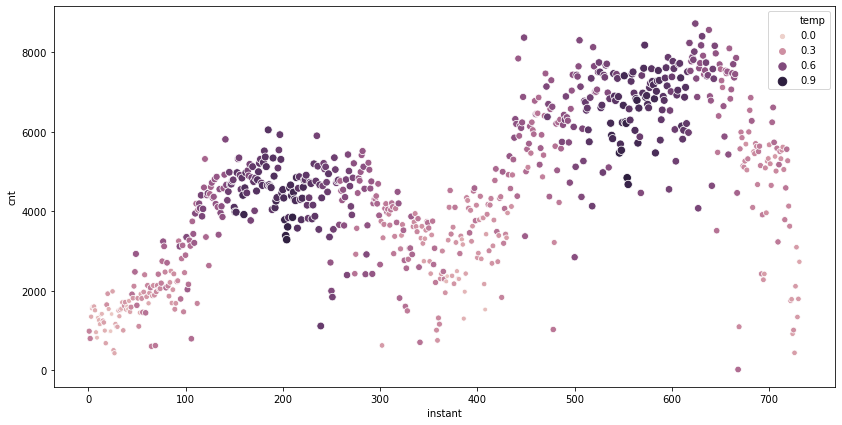

In [20]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='instant', y='cnt', hue='temp', size='temp')

### 6.4-. Año-Rentas

#### La renta de bicicletas incrementó considerablemente en el 2012 en comparación del año anterior (2011).

<Figure size 432x288 with 0 Axes>

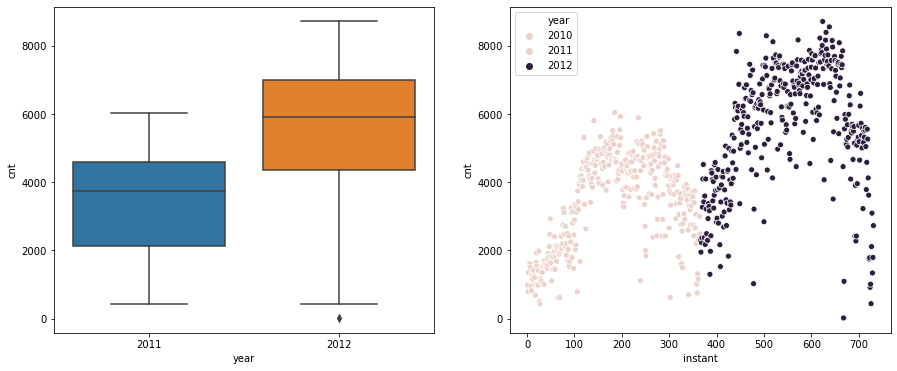

In [21]:
plt.figure()

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='year', y='cnt')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='instant', y='cnt', hue='year')

### 6.5-. Weathersit-Rentas

#### Hay un mayor número de rentas cuando el cielo está despejado o hay pocas nubes, generalmente (color azul en el boxplot y círculos claros en el scatterplot). El peor estado del tiempo para la renta de bicicletas es cuando hay lluvia ligera, nieve ligera, nubes dispersas o tormentas eléctricas (color verde en el boxplot y círculos oscuros en el scatterplot)

<Figure size 432x288 with 0 Axes>

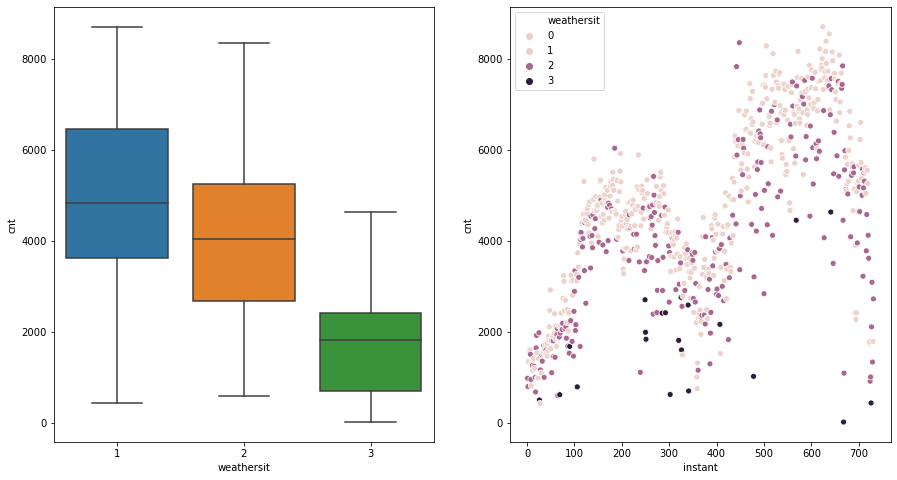

In [22]:
plt.figure()

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='instant', y='cnt', hue='weathersit')